In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
import pickle

In [526]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [527]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [528]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [529]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

As we have observed that Age is having 177 Null values of Float Data type and Embarked with only 2 Null Values of Object Data type. But as the number of missing values are very much, we can not drop all these values because of our dataset would not be much enough for making our Survival Prediction ML Model perfect. So we are going to fill these NaN values by Mean in case of Float and by Mode (Most Frequent) value for the Object type.

Cabin is also having 687 NaN values with object data type. But Cabin Number is not useful for us to make ML Model for our required predictions. And we will drop the Cabin Column later on.

In [530]:
mv=df['Age'].mean()

In [531]:
mv

29.69911764705882

In [532]:
df['Age']=df['Age'].fillna(value=30)

In [533]:
df['Age'].isnull().sum()

0

In [534]:
E_mode=df['Embarked'].mode()
E_mode

0    S
Name: Embarked, dtype: object

In [535]:
df['Embarked']=df['Embarked'].fillna(value='S')

In [536]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [537]:
df['Embarked'].isnull().sum()

0

In [538]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For making our ML Model the columns:- Name, Ticket & Cabin are not required, so we are drop these columns

In [539]:
df.drop(['Name'],axis=1,inplace=True)

In [540]:
df.drop(['Ticket'],axis=1,inplace=True)

In [541]:
df.drop(['Cabin'],axis=1,inplace=True)

In [542]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [543]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

As we have to predict the Survived column, so it will be our target or label column. And we are shifting the same to last column of our dataset.

In [544]:
target=df.pop('Survived')

In [545]:
df.insert(8, 'Survived', target)

In [546]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,0
887,888,1,female,19.0,0,0,30.0000,S,1
888,889,3,female,30.0,1,2,23.4500,S,0
889,890,1,male,26.0,0,0,30.0000,C,1


Now by using the Label Encoder, we are changing the values of Gender & Embarked from Object data type to Numeric value for making our ML model.

In [547]:
le=sklearn.preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [548]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,2,0
1,2,1,0,38.0,1,0,71.2833,0,1
2,3,3,0,26.0,0,0,7.9250,2,1
3,4,1,0,35.0,1,0,53.1000,2,1
4,5,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2,0
887,888,1,0,19.0,0,0,30.0000,2,1
888,889,3,0,30.0,1,2,23.4500,2,0
889,890,1,1,26.0,0,0,30.0000,0,1


PassengerId       AxesSubplot(0.125,0.653529;0.227941x0.226471)
Pclass         AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Sex            AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Age               AxesSubplot(0.125,0.381765;0.227941x0.226471)
SibSp          AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Parch          AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Fare                  AxesSubplot(0.125,0.11;0.227941x0.226471)
Embarked           AxesSubplot(0.398529,0.11;0.227941x0.226471)
Survived           AxesSubplot(0.672059,0.11;0.227941x0.226471)
dtype: object

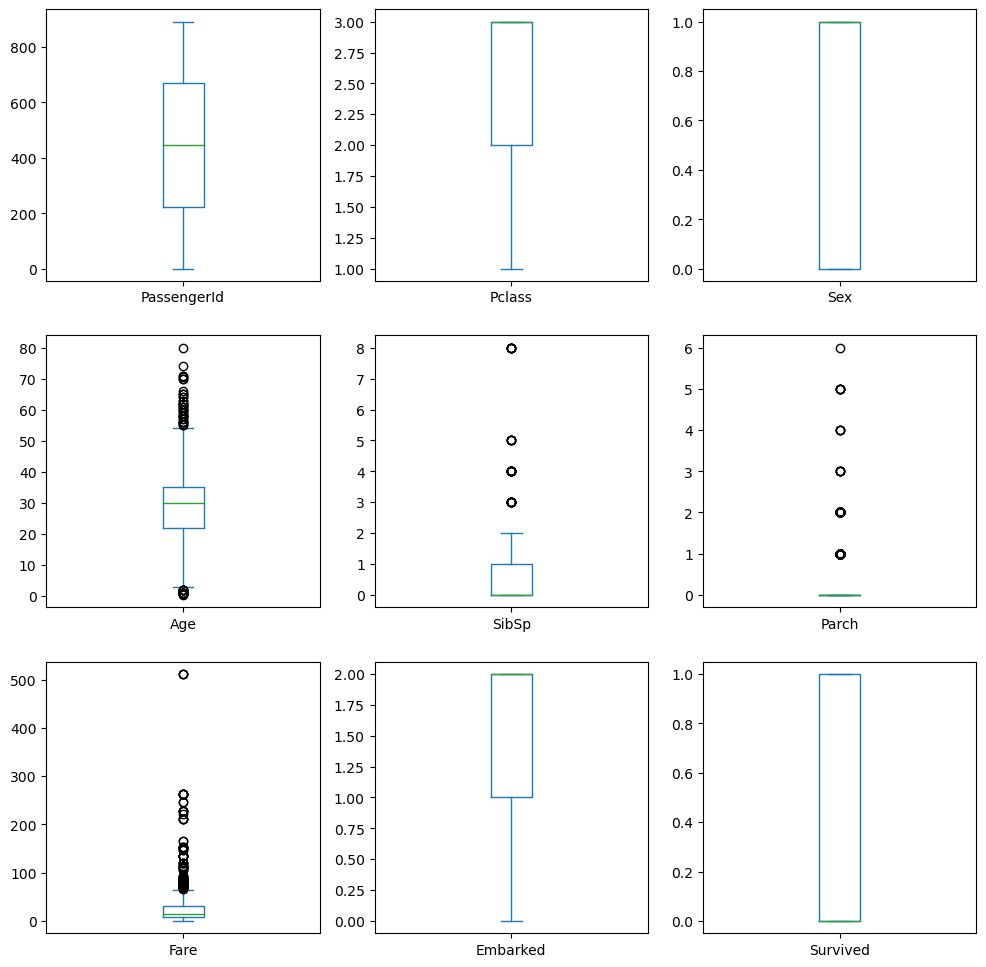

In [549]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),subplots=True)

In [550]:
df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208,1.536476,0.383838
std,257.353842,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.791503,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


By the above EDA, we have observed that the data are not normally distributed of columns:- Age, SibSP, Parch & Fare and having very much outliers.

Now we are replacing the outlier values lying above the 75% percentile by the mean of the respective columns

In [551]:
df.loc[df['Age']>=35,'Age']=df['Age'].mean()

<AxesSubplot:>

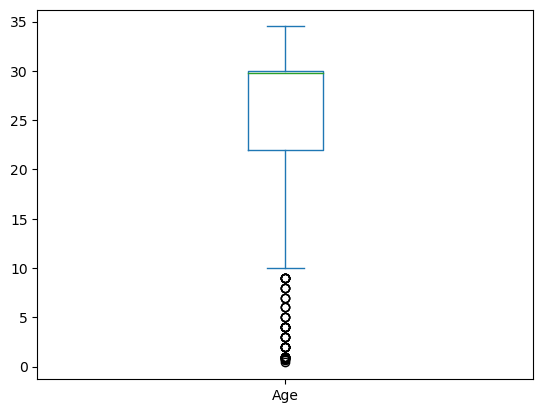

In [552]:
df['Age'].plot.box()

In [553]:
df.loc[df['Fare']>=31,'Fare']=df['Fare'].mean()

<AxesSubplot:>

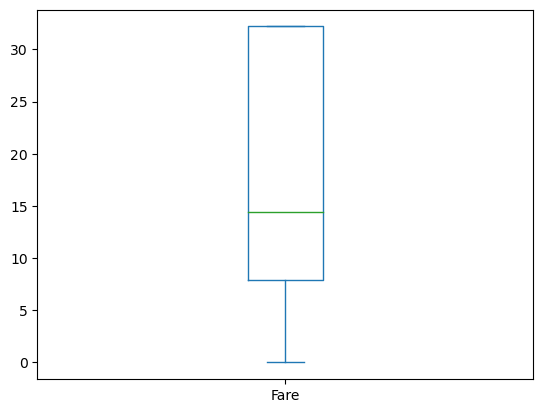

In [554]:
df['Fare'].plot.box()

In [555]:
df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,25.459045,0.523008,0.381594,18.137383,1.536476,0.383838
std,257.353842,0.836071,0.477990,7.563701,1.102743,0.806057,10.489621,0.791503,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,3.000000,1.000000,29.758889,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,3.000000,1.000000,30.000000,1.000000,0.000000,32.204208,2.000000,1.000000
max,891.000000,3.000000,1.000000,34.500000,8.000000,6.000000,32.204208,2.000000,1.000000


In [556]:
z=np.abs(zscore(df))
z

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.730108,0.827377,0.737695,0.457579,0.432793,0.473674,1.038503,0.585954,0.789272
1,1.726220,1.566107,1.355574,0.568803,0.432793,0.473674,1.341776,1.942303,1.266990
2,1.722332,0.827377,1.355574,0.071560,0.474545,0.473674,0.974117,0.585954,1.266990
3,1.718444,1.566107,1.355574,0.568803,0.432793,0.473674,1.341776,0.585954,1.266990
4,1.714556,0.827377,0.737695,0.568803,0.474545,0.473674,0.962194,0.585954,0.789272
...,...,...,...,...,...,...,...,...,...
886,1.714556,0.369365,0.737695,0.203845,0.474545,0.473674,0.490034,0.585954,0.789272
887,1.718444,1.566107,1.355574,0.854433,0.474545,0.473674,1.131526,0.585954,1.266990
888,1.722332,0.827377,1.355574,0.600699,0.432793,2.008933,0.506749,0.585954,0.789272
889,1.726220,1.566107,0.737695,0.071560,0.474545,0.473674,1.131526,1.942303,1.266990


In [557]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.000000,1,0,7.250000,2,0
1,2,1,0,29.758889,1,0,32.204208,0,1
2,3,3,0,26.000000,0,0,7.925000,2,1
3,4,1,0,29.758889,1,0,32.204208,2,1
4,5,3,1,29.758889,0,0,8.050000,2,0
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.000000,2,0
887,888,1,0,19.000000,0,0,30.000000,2,1
888,889,3,0,30.000000,1,2,23.450000,2,0
889,890,1,1,26.000000,0,0,30.000000,0,1


After reducing the outliers and eliminating the data of zscore above 3 standard deviation both sides, we have lost 64 rows (891 - 827). And got our cleaned dataset of 827 rows, which are good enough for making our ML Model for best Survival predictions.

In [558]:
x=cleaned_df.iloc[:,0:-1]

In [559]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.250000,2
1,2,1,0,29.758889,1,0,32.204208,0
2,3,3,0,26.000000,0,0,7.925000,2
3,4,1,0,29.758889,1,0,32.204208,2
4,5,3,1,29.758889,0,0,8.050000,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.000000,2
887,888,1,0,19.000000,0,0,30.000000,2
888,889,3,0,30.000000,1,2,23.450000,2
889,890,1,1,26.000000,0,0,30.000000,0


In [560]:
y=cleaned_df.iloc[:,-1]

In [561]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 827, dtype: int64

In [562]:
x.shape

(827, 8)

In [563]:
y.shape

(827,)

Out of 827 rows dataset, we are sending 75% data for training and rest 25% data for testing usage.

In [564]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=43)

In [565]:
xtrain.shape

(620, 8)

In [566]:
ytrain.shape

(620,)

In [567]:
xtest.shape

(207, 8)

In [568]:
ytest.shape

(207,)

Now we are going to apply difference Classification type Algorithms to get the best predictable ML Model.

In [569]:
lr=LogisticRegression()

In [570]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [571]:
pred1=lr.predict(xtest)

In [572]:
pred1

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [573]:
accuracy_score(ytest,pred1)

0.8164251207729468

In [574]:
dtc=DecisionTreeClassifier()

In [575]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [576]:
pred2=dtc.predict(xtest)

In [577]:
accuracy_score(ytest,pred2)

0.748792270531401

In [578]:
mnb=MultinomialNB()

In [579]:
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [580]:
pred3=mnb.predict(xtest)

In [581]:
accuracy_score(ytest,pred3)

0.6328502415458938

In [582]:
gnb=GaussianNB()

In [583]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [584]:
pred4=gnb.predict(xtest)

In [585]:
accuracy_score(ytest,pred4)

0.7971014492753623

In [586]:
bnb=BernoulliNB()

In [587]:
bnb.fit(xtrain,ytrain)

BernoulliNB()

In [588]:
pred5=bnb.predict(xtest)

In [589]:
accuracy_score(ytest,pred5)

0.8019323671497585

In [590]:
svmc=SVC()

In [591]:
svmc.fit(xtrain,ytrain)

SVC()

In [592]:
pred6=svmc.predict(xtest)

In [593]:
accuracy_score(ytest,pred6)

0.5942028985507246

In [594]:
rfc=RandomForestClassifier()

In [595]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [596]:
pred7=rfc.predict(xtest)

In [597]:
accuracy_score(ytest,pred7)

0.8405797101449275

In [598]:
knn=KNeighborsClassifier()

In [599]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [600]:
pred8=knn.predict(xtest)

In [601]:
accuracy_score(ytest,pred8)

0.6183574879227053

In [602]:
stc=SGDClassifier()

In [603]:
stc.fit(xtrain,ytrain)

SGDClassifier()

In [604]:
pred9=stc.predict(xtest)

In [605]:
accuracy_score(ytest,pred9)

0.45410628019323673

In [606]:
rcl=RidgeClassifier()

In [607]:
rcl.fit(xtrain,ytrain)

RidgeClassifier()

In [608]:
pred10=rcl.predict(xtest)

In [609]:
accuracy_score(ytest,pred10)

0.8115942028985508

In [610]:
print(accuracy_score(ytest,pred1),accuracy_score(ytest,pred2),accuracy_score(ytest,pred3),accuracy_score(ytest,pred4),accuracy_score(ytest,pred5),accuracy_score(ytest,pred6),accuracy_score(ytest,pred7),accuracy_score(ytest,pred8),accuracy_score(ytest,pred9),accuracy_score(ytest,pred10))

0.8164251207729468 0.748792270531401 0.6328502415458938 0.7971014492753623 0.8019323671497585 0.5942028985507246 0.8405797101449275 0.6183574879227053 0.45410628019323673 0.8115942028985508


By the above 10 Classification Algorithms accuracy scores, we are not getting the excellent score, but got the best accuracy score via pred7 of Random Forest Classifier with accuracy score of 0.86 (86%) approximately.

So we are going to save our Random Forest Classifier ML Model for the Titanic dataset Survival predictions.

In [611]:
pickle.dump(rfc, open('my_rfc_model', 'wb'))

In [612]:
rfc_model=pickle.load(open('my_rfc_model', 'rb'))

In [613]:
model_pred_y=rfc_model.predict(xtest)

In [614]:
model_pred_y

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [615]:
accuracy_score(ytest,model_pred_y)

0.8405797101449275

In [616]:
model_pred_x=rfc_model.predict(xtrain)

In [617]:
accuracy_score(ytrain,model_pred_x)

1.0

We have applied our saved ML model in our 25% test dataset and got 86% accuracy score. But while we are applying the same saved ML model in our rest 75% traing dataset for its target prediction, we are getting the excellent accuracy score of 1.0 (i.e. of 100% accuracy score).